# Wine Quality Prediction: Otimização da Produção Vinícola através de Machine Learning
# Autor: Eric Pimentel
# Data: 6/10/2024

# 1. INTRODUÇÃO

## 1.1 Contextualização do Mercado
A indústria vinícola global está passando por uma transformação significativa, onde a tradição secular 
de produção de vinhos encontra-se com a modernidade da ciência de dados. Em um mercado que movimenta 
bilhões anualmente, a qualidade do produto final é o principal diferencial competitivo.

## 1.2 Desafio de Negócio
Nossa vinícola busca manter sua posição de destaque no mercado através da consistência e excelência 
de seus produtos. O principal desafio é:
- Prever com precisão a qualidade do vinho antes da conclusão do processo de produção
- Identificar os fatores físico-químicos mais influentes na qualidade final
- Otimizar o processo produtivo baseado em dados

## 1.3 Objetivos do Projeto
### Objetivo Principal:
Desenvolver um modelo preditivo capaz de avaliar a qualidade do vinho com base em suas características 
físico-químicas, permitindo intervenções precoces no processo de produção.

### Objetivos Específicos:
1. Identificar padrões e correlações entre as características físico-químicas e a qualidade
2. Criar um modelo de machine learning com acurácia significativa para respaldar as prevvisões
3. Fornecer insights acionáveis para otimização do processo produtivo

## 1.4 Impacto Esperado no Negócio
- Redução de custos operacionais
- Diminuição do desperdício de matéria-prima
- Aumento da consistência na qualidade do produto
- Otimização do tempo de produção
- Fortalecimento da marca no mercado premium

## 1.5 Metodologia
O projeto seguirá a metodologia CRISP-DM (Cross-Industry Standard Process for Data Mining):
1. Compreensão do Negócio ✓
2. Compreensão dos Dados
3. Preparação dos Dados
4. Modelagem
5. Avaliação
6. Implantação

## 1.6 Dataset
O Wine Quality Dataset contém as seguintes variáveis físico-químicas:
- Acidez fixa
- Acidez volátil
- Ácido cítrico
- Açúcar residual
- Cloretos
- Dióxido de enxofre livre
- Dióxido de enxofre total
- Densidade
- pH
- Sulfatos
- Álcool
- Qualidade (variável target)

## 1.7 Métricas de Sucesso
- R² (Coeficiente de Determinação)
- RMSE (Root Mean Square Error)
- MAE (Mean Absolute Error)

## 1.8 Entregas Previstas
1. Modelo preditivo implementado
2. Dashboard interativo para visualização dos resultados
3. Relatório com recomendações práticas
4. Documentação completa do projeto

## 1.9 Próximos Passos
A seguir, iniciaremos a análise exploratória dos dados para entender profundamente as características 
do nosso dataset e identificar padrões iniciais que guiarão nossa estratégia de modelagem.


In [11]:
# Importando as bibliotecas necessárias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [16]:
# Configurações de visualização - versão corrigida
plt.style.use('default')  # usando estilo padrão
sns.set_theme()  # configuração moderna do seaborn
pd.set_option('display.max_columns', None)

# Importando os dados
df = pd.read_csv('Wine_QT.csv')

# Visão geral inicial dos dados
print("Dimensões do dataset:", df.shape)
print("\nPrimeiras linhas do dataset:")
df.head()


Dimensões do dataset: (1143, 13)

Primeiras linhas do dataset:


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [17]:
# Informações sobre os tipos de dados e valores nulos
print("\nInformações sobre o dataset:")
df.info()



Informações sobre o dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [24]:

# Estatísticas descritivas
print("\nEstatísticas descritivas:")
df.describe().drop(columns=['Id'])



Estatísticas descritivas:


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [19]:

# Verificando valores nulos
print("\nValores nulos por coluna:")
df.isnull().sum()


Valores nulos por coluna:


fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

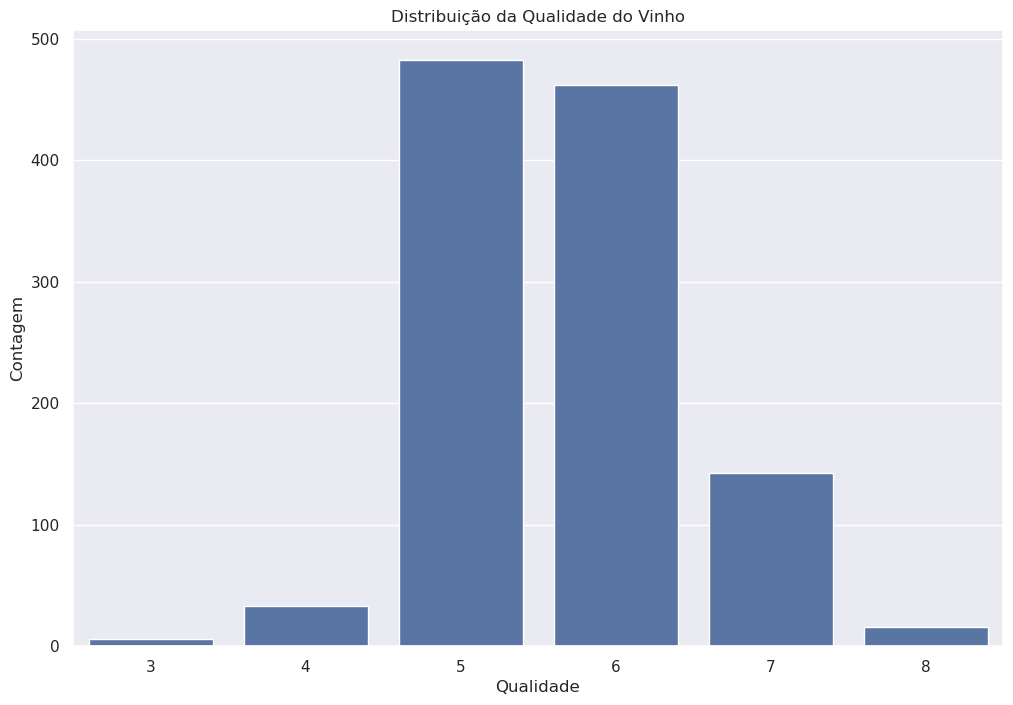

In [20]:
# Distribuição da qualidade do vinho (nossa variável target)
plt.figure(figsize=(12, 8))
sns.countplot(data=df, x='quality')
plt.title('Distribuição da Qualidade do Vinho')
plt.xlabel('Qualidade')
plt.ylabel('Contagem')
plt.show()



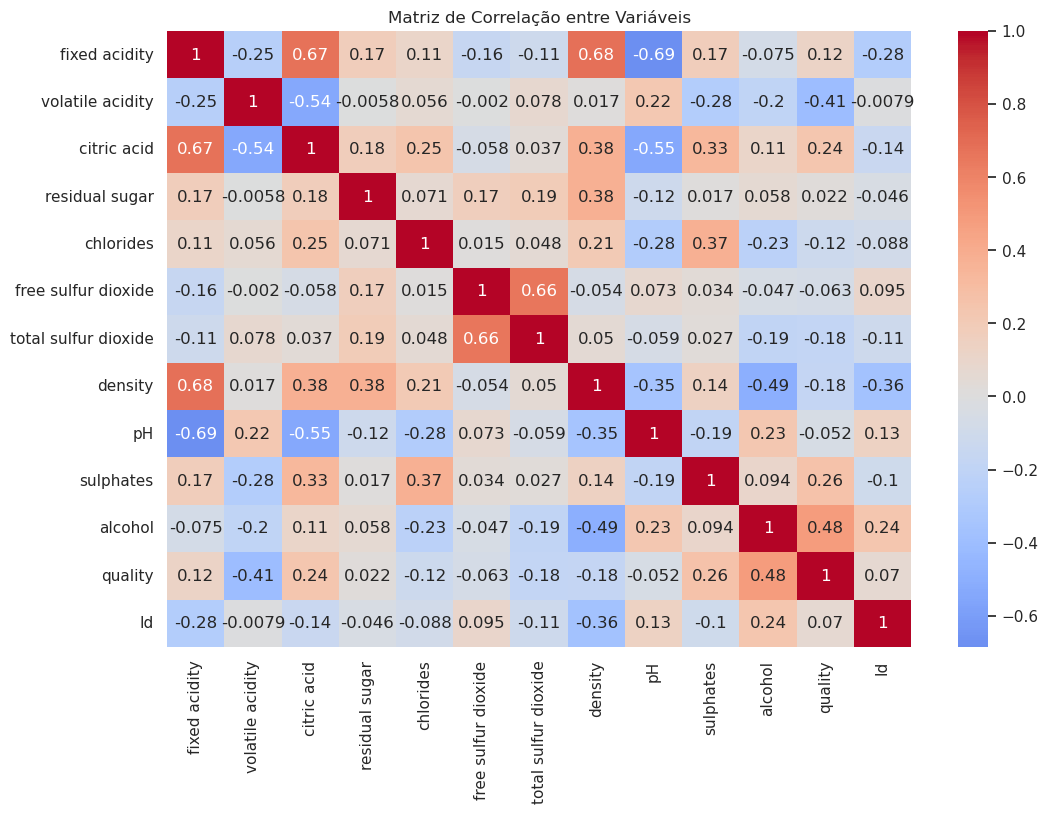

In [21]:
# Matriz de correlação
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Matriz de Correlação entre Variáveis')
plt.show()



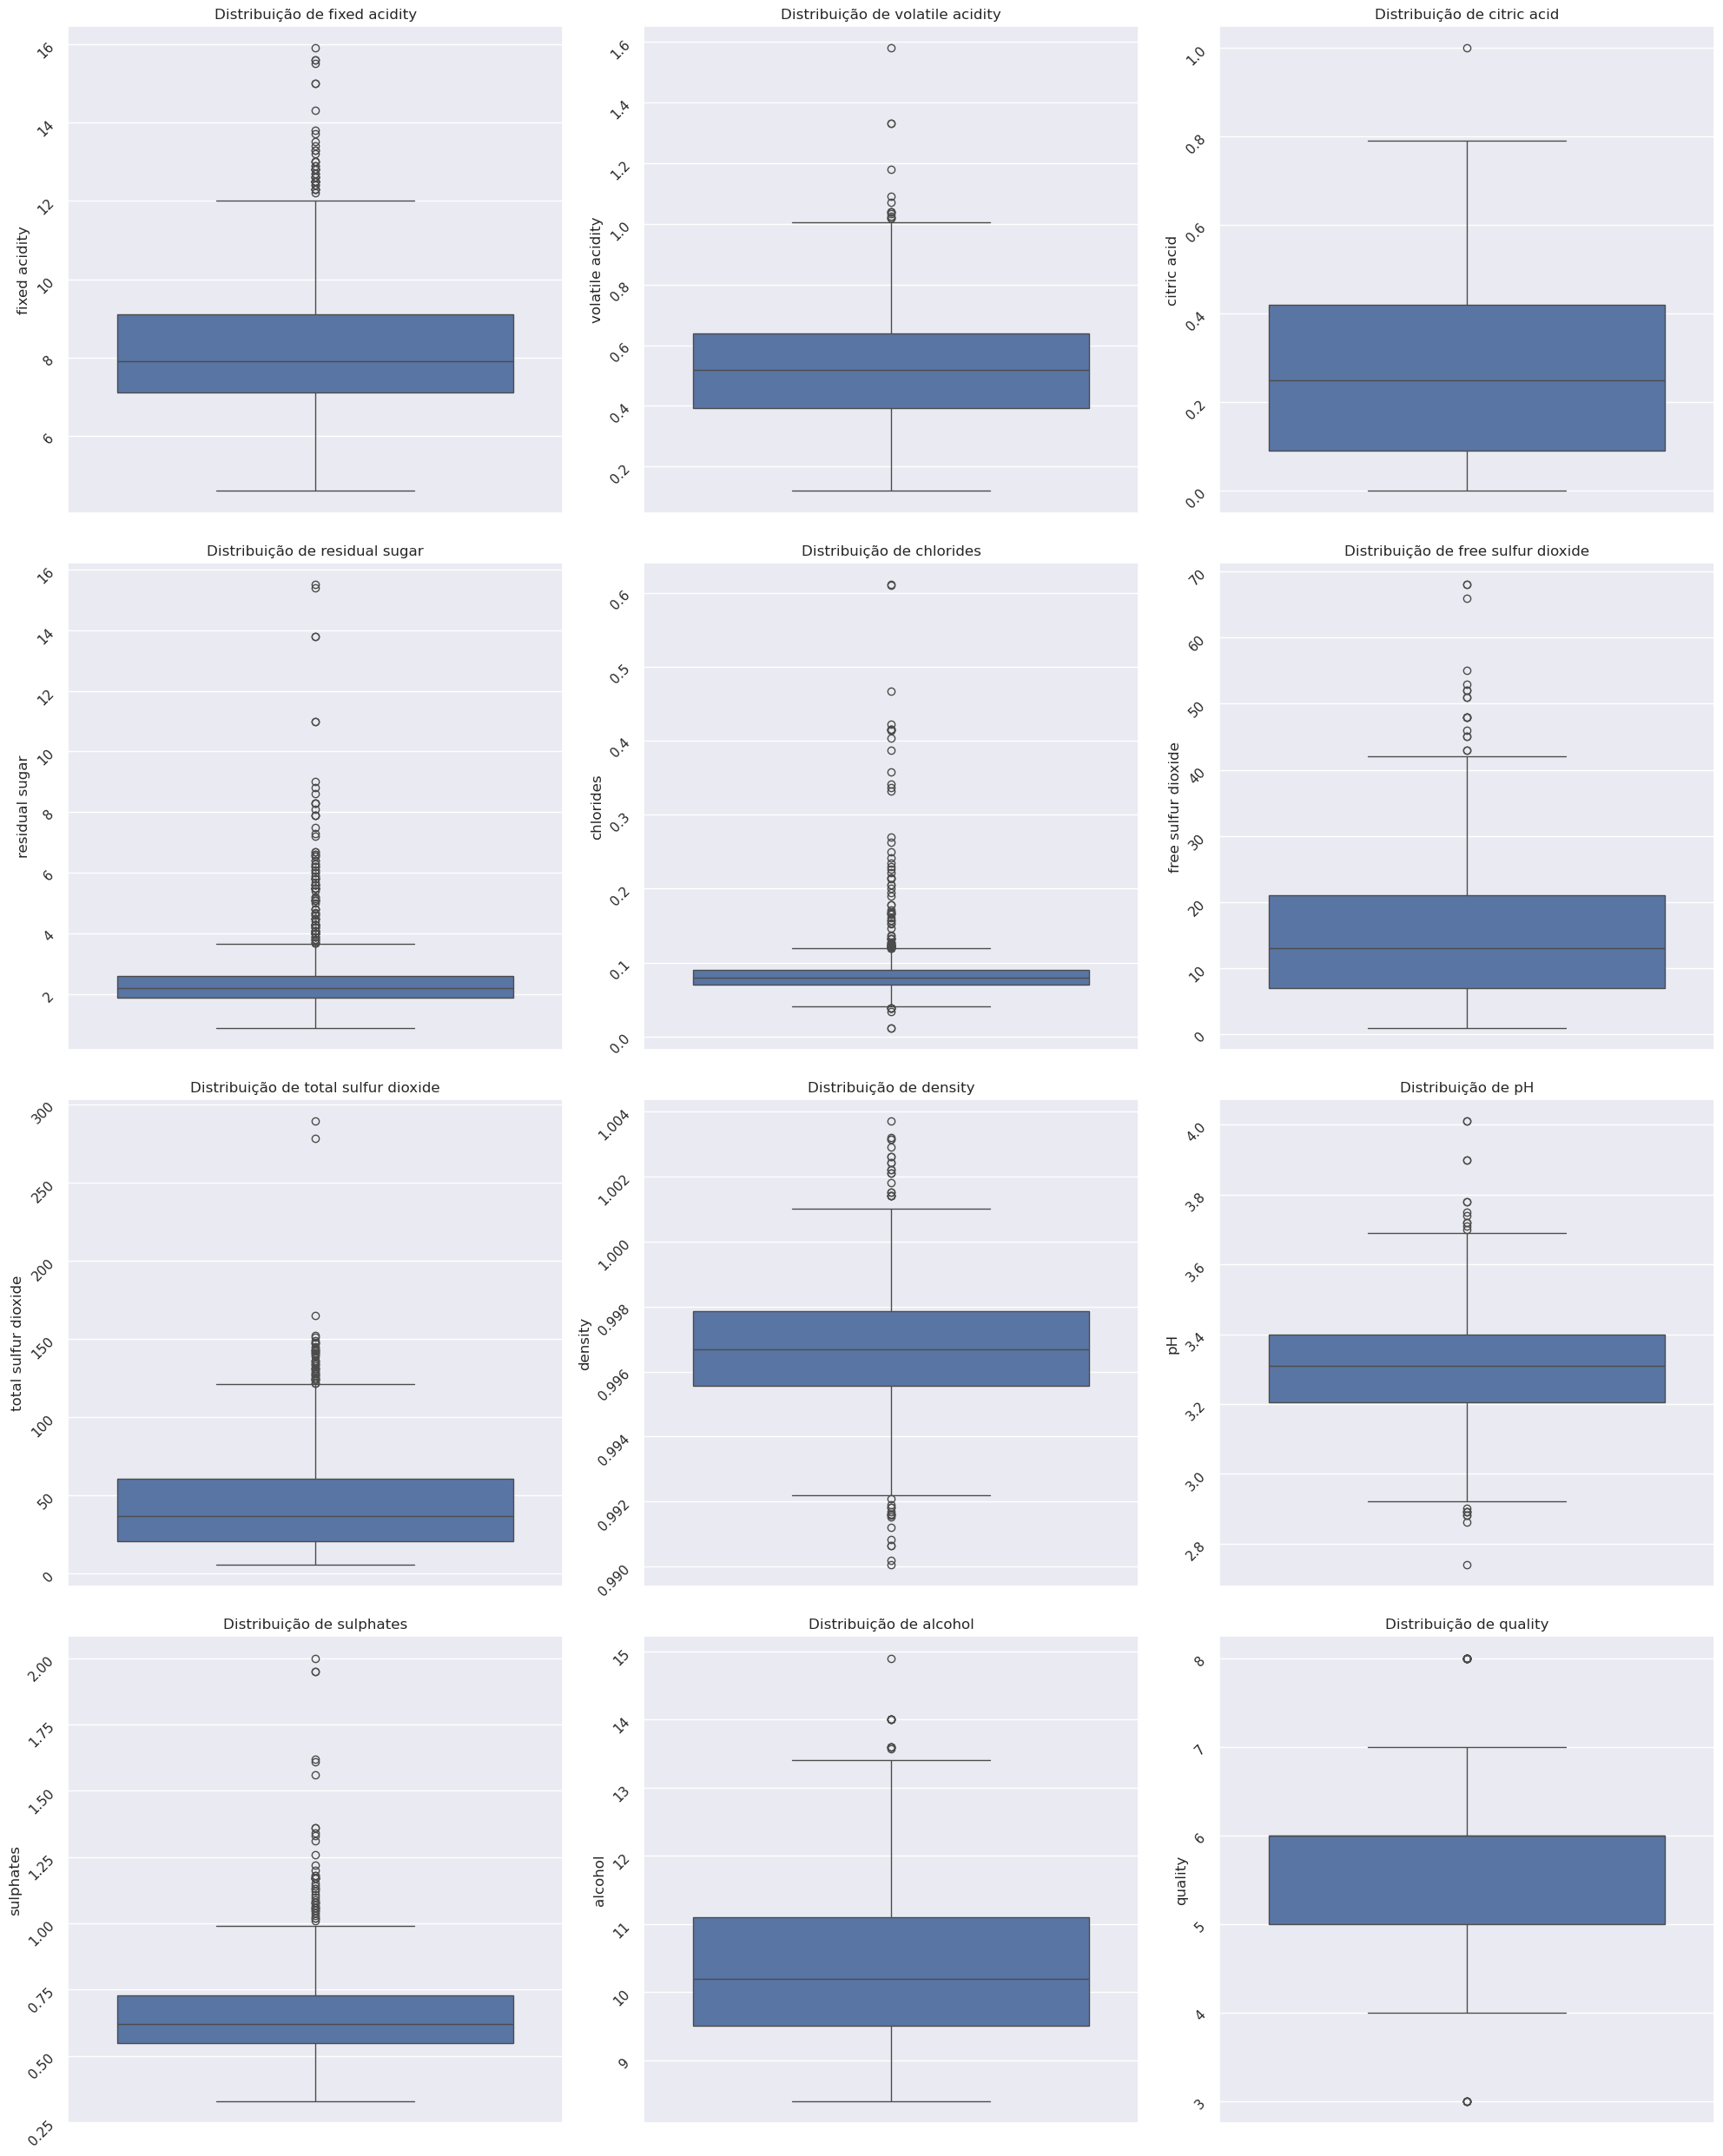


Análise de Outliers:

fixed acidity:
Número de outliers: 44
Limite inferior: 4.10
Limite superior: 12.10
Min: 4.60
Max: 15.90

volatile acidity:
Número de outliers: 14
Limite inferior: 0.02
Limite superior: 1.01
Min: 0.12
Max: 1.58

citric acid:
Número de outliers: 1
Limite inferior: -0.40
Limite superior: 0.91
Min: 0.00
Max: 1.00

residual sugar:
Número de outliers: 110
Limite inferior: 0.85
Limite superior: 3.65
Min: 0.90
Max: 15.50

chlorides:
Número de outliers: 77
Limite inferior: 0.04
Limite superior: 0.12
Min: 0.01
Max: 0.61

free sulfur dioxide:
Número de outliers: 18
Limite inferior: -14.00
Limite superior: 42.00
Min: 1.00
Max: 68.00

total sulfur dioxide:
Número de outliers: 40
Limite inferior: -39.00
Limite superior: 121.00
Min: 6.00
Max: 289.00

density:
Número de outliers: 36
Limite inferior: 0.99
Limite superior: 1.00
Min: 0.99
Max: 1.00

pH:
Número de outliers: 20
Limite inferior: 2.91
Limite superior: 3.69
Min: 2.74
Max: 4.01

sulphates:
Número de outliers: 43
Limite i

In [27]:
# Criando subplots para boxplots individuais
fig, axes = plt.subplots(4, 3, figsize=(20, 25))
axes = axes.ravel()

# Removendo a coluna 'Id' se existir
columns_to_plot = df.drop(columns=['Id'] if 'Id' in df.columns else []).columns

for idx, column in enumerate(columns_to_plot):
    sns.boxplot(data=df, y=column, ax=axes[idx])
    axes[idx].set_title(f'Distribuição de {column}')
    axes[idx].tick_params(rotation=45)

# Removendo subplots vazios extras se houver
for idx in range(len(columns_to_plot), len(axes)):
    fig.delaxes(axes[idx])

plt.tight_layout()
plt.show()

# Adicionalmente, vamos criar uma análise mais detalhada dos outliers
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)][column]
    return len(outliers), lower_bound, upper_bound

# Análise de outliers para cada variável
print("\nAnálise de Outliers:")
for column in df.drop(columns=['quality', 'Id'] if 'Id' in df.columns else ['quality']).columns:
    n_outliers, lower, upper = detect_outliers(df, column)
    print(f"\n{column}:")
    print(f"Número de outliers: {n_outliers}")
    print(f"Limite inferior: {lower:.2f}")
    print(f"Limite superior: {upper:.2f}")
    print(f"Min: {df[column].min():.2f}")
    print(f"Max: {df[column].max():.2f}")

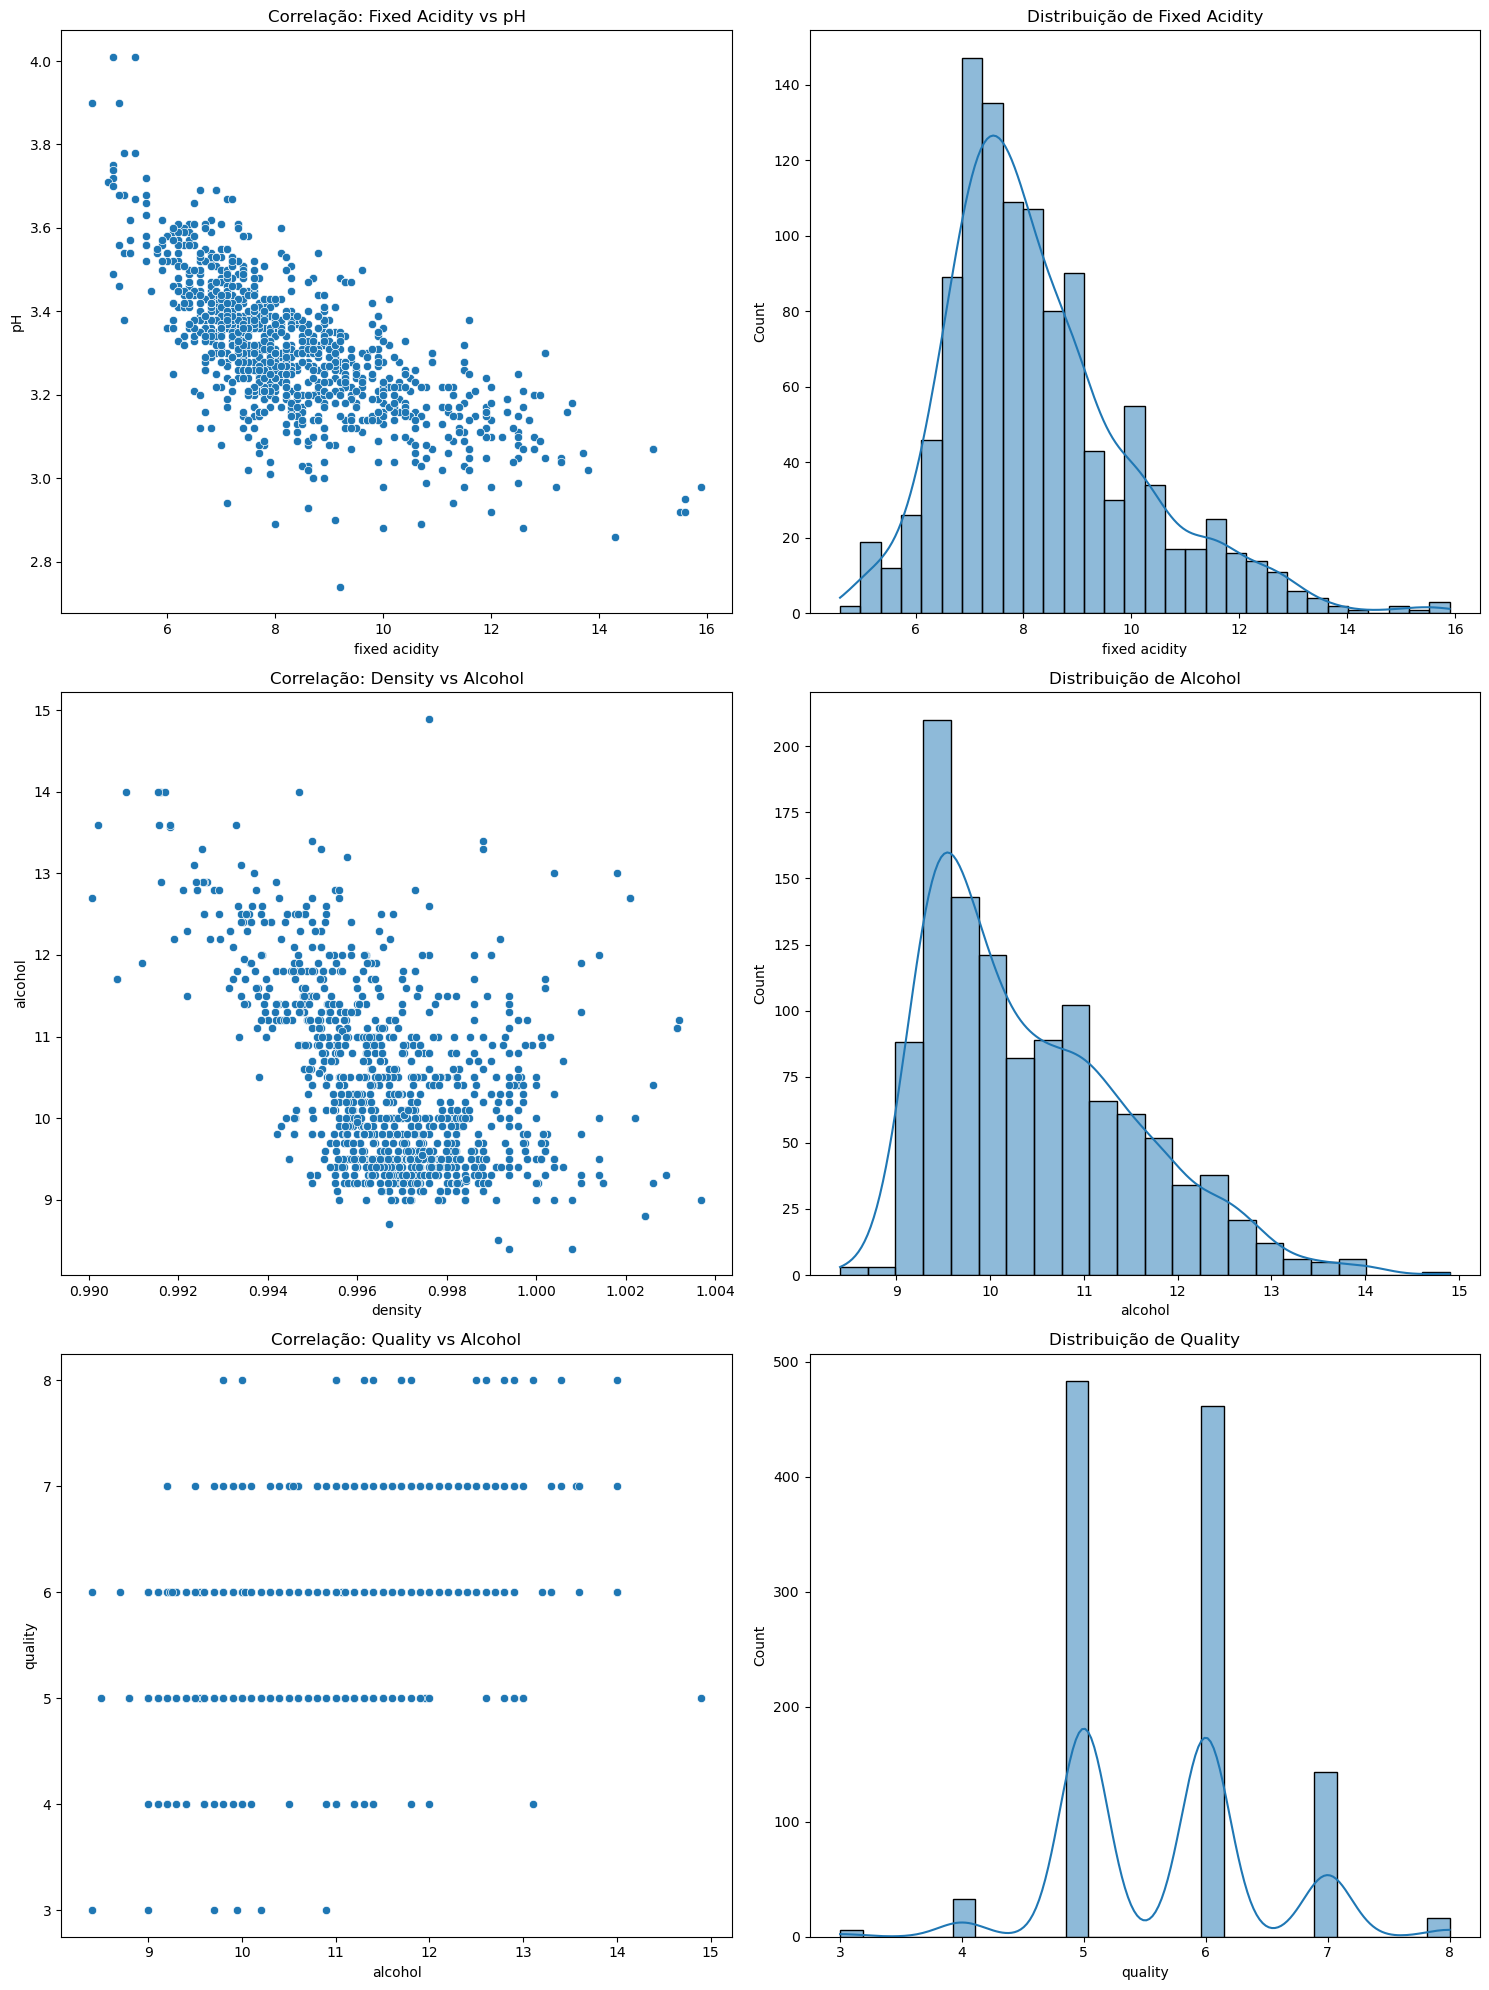

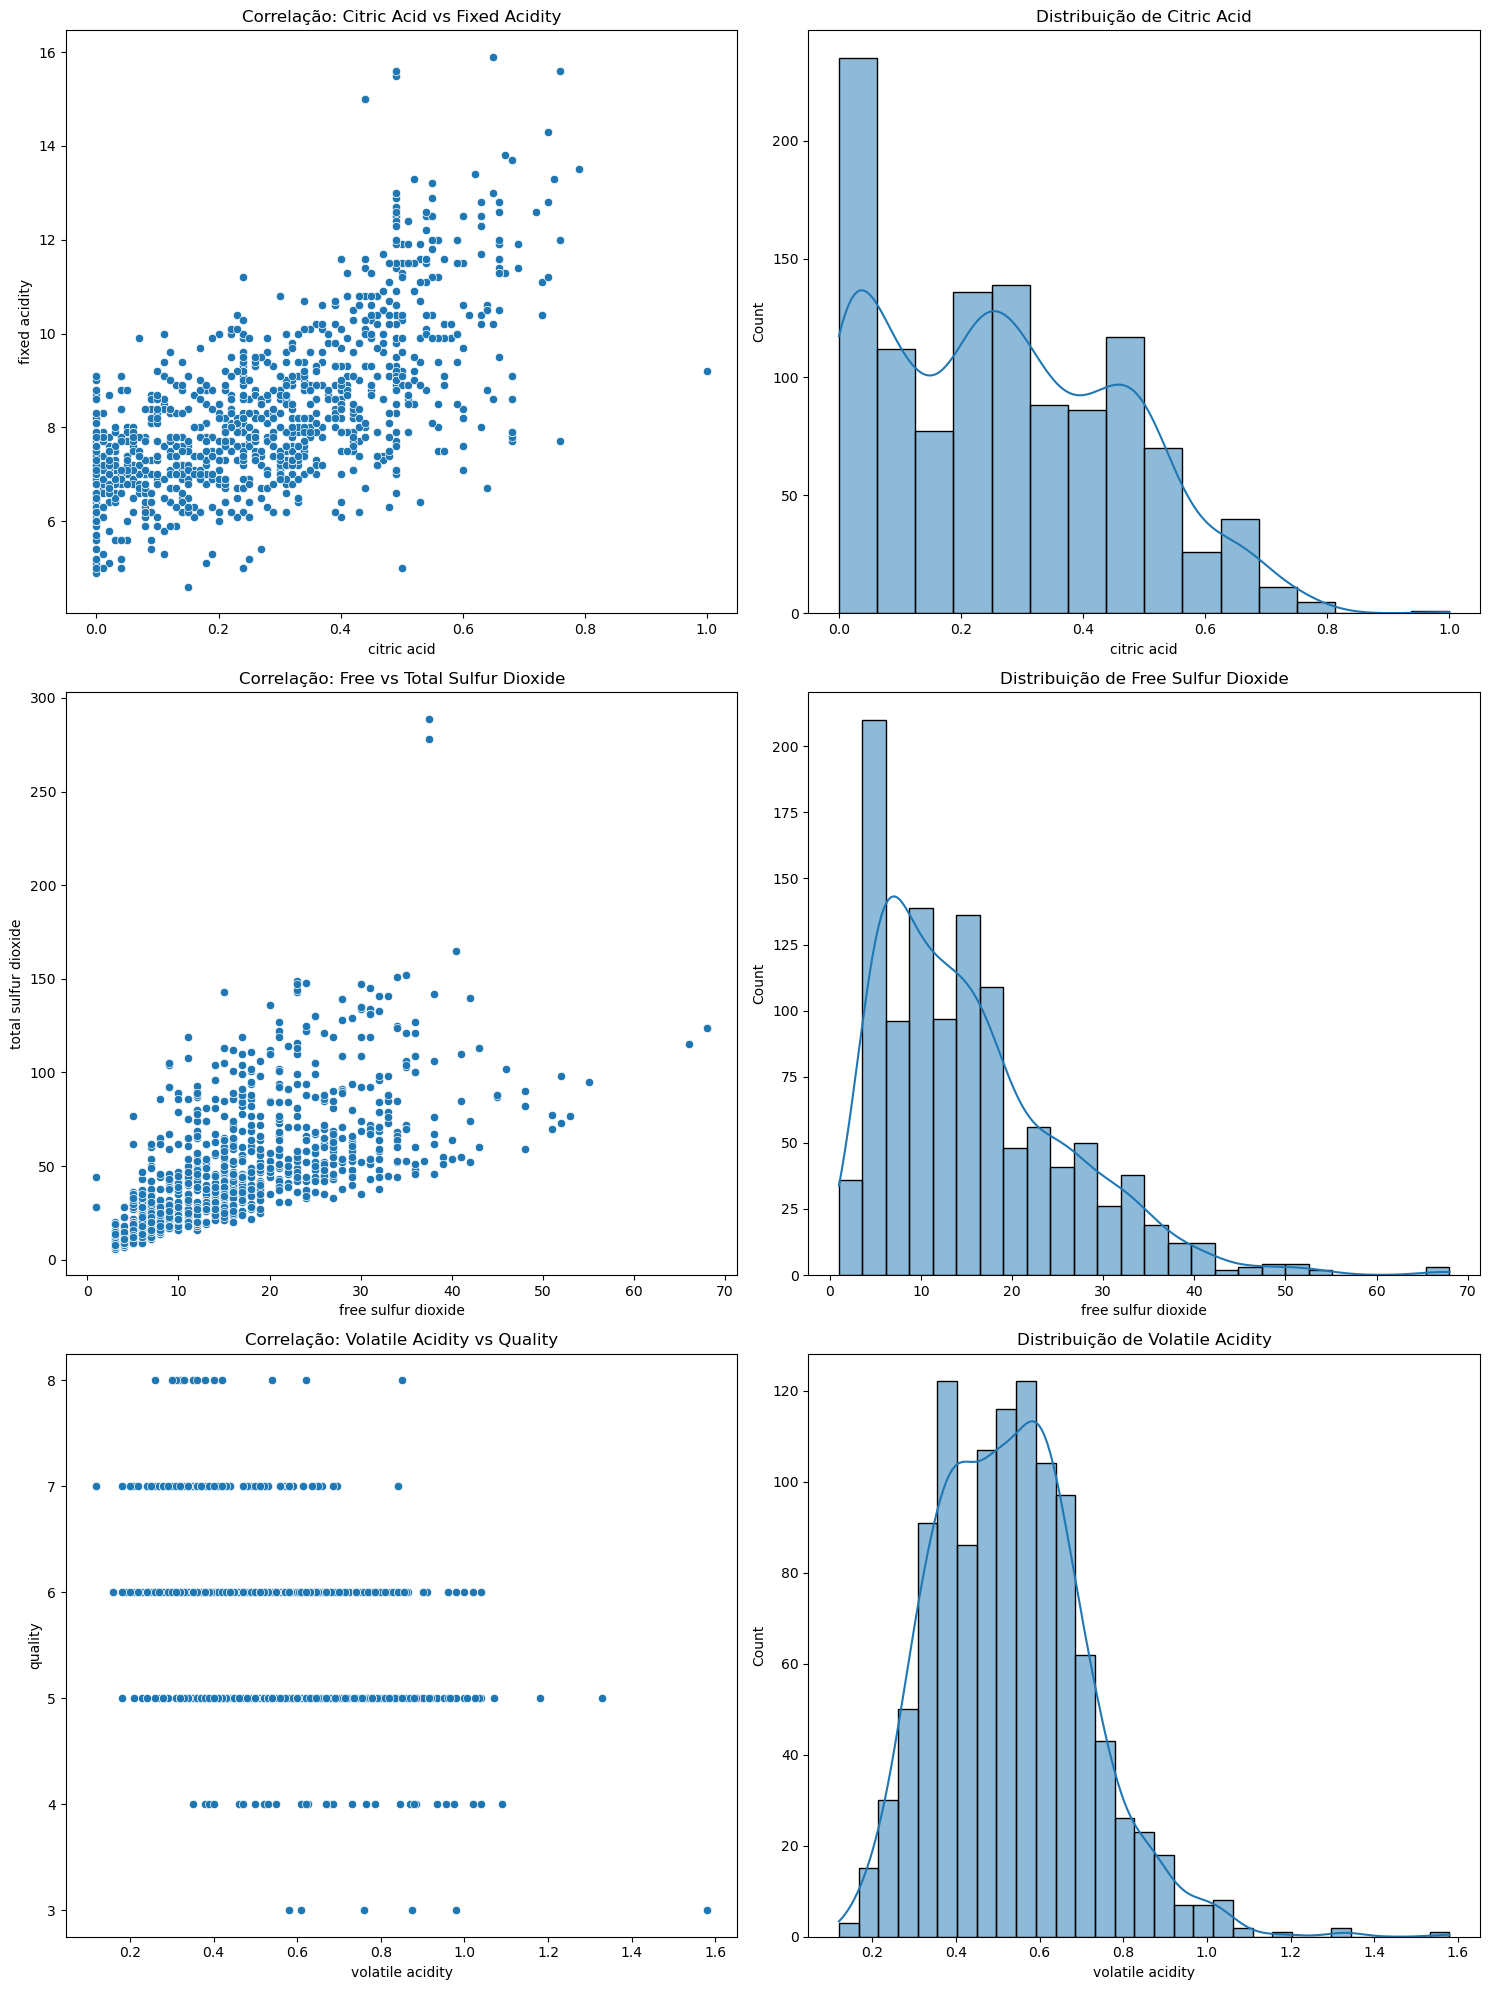


Estatísticas para fixed acidity:
count    1143.000000
mean        8.311111
std         1.747595
min         4.600000
25%         7.100000
50%         7.900000
75%         9.100000
max        15.900000
Name: fixed acidity, dtype: float64

Estatísticas para pH:
count    1143.000000
mean        3.311015
std         0.156664
min         2.740000
25%         3.205000
50%         3.310000
75%         3.400000
max         4.010000
Name: pH, dtype: float64

Estatísticas para density:
count    1143.000000
mean        0.996730
std         0.001925
min         0.990070
25%         0.995570
50%         0.996680
75%         0.997845
max         1.003690
Name: density, dtype: float64

Estatísticas para alcohol:
count    1143.000000
mean       10.442111
std         1.082196
min         8.400000
25%         9.500000
50%        10.200000
75%        11.100000
max        14.900000
Name: alcohol, dtype: float64

Estatísticas para quality:
count    1143.000000
mean        5.657043
std         0.805824
min

In [33]:
# Configuração básica
plt.style.use('default')
fig, axes = plt.subplots(3, 2, figsize=(15, 20))

# 1. Correlação entre Fixed Acidity e pH (-0.69)
sns.scatterplot(data=df, x='fixed acidity', y='pH', ax=axes[0,0])
axes[0,0].set_title('Correlação: Fixed Acidity vs pH')

# Histograma Fixed Acidity
sns.histplot(data=df, x='fixed acidity', kde=True, ax=axes[0,1])
axes[0,1].set_title('Distribuição de Fixed Acidity')

# 2. Correlação entre Density e Alcohol (-0.49)
sns.scatterplot(data=df, x='density', y='alcohol', ax=axes[1,0])
axes[1,0].set_title('Correlação: Density vs Alcohol')

# Histograma Alcohol
sns.histplot(data=df, x='alcohol', kde=True, ax=axes[1,1])
axes[1,1].set_title('Distribuição de Alcohol')

# 3. Correlação entre Quality e Alcohol (0.48)
sns.scatterplot(data=df, x='alcohol', y='quality', ax=axes[2,0])
axes[2,0].set_title('Correlação: Quality vs Alcohol')

# Histograma Quality
sns.histplot(data=df, x='quality', kde=True, ax=axes[2,1])
axes[2,1].set_title('Distribuição de Quality')

plt.tight_layout()
plt.show()

# Segunda figura
fig, axes = plt.subplots(3, 2, figsize=(15, 20))

# 1. Correlação entre Citric Acid e Fixed Acidity (0.67)
sns.scatterplot(data=df, x='citric acid', y='fixed acidity', ax=axes[0,0])
axes[0,0].set_title('Correlação: Citric Acid vs Fixed Acidity')

# Histograma Citric Acid
sns.histplot(data=df, x='citric acid', kde=True, ax=axes[0,1])
axes[0,1].set_title('Distribuição de Citric Acid')

# 2. Correlação entre Free Sulfur Dioxide e Total Sulfur Dioxide (0.66)
sns.scatterplot(data=df, x='free sulfur dioxide', y='total sulfur dioxide', ax=axes[1,0])
axes[1,0].set_title('Correlação: Free vs Total Sulfur Dioxide')

# Histograma Sulfur Dioxide
sns.histplot(data=df, x='free sulfur dioxide', kde=True, ax=axes[1,1])
axes[1,1].set_title('Distribuição de Free Sulfur Dioxide')

# 3. Correlação entre Volatile Acidity e Quality (-0.41)
sns.scatterplot(data=df, x='volatile acidity', y='quality', ax=axes[2,0])
axes[2,0].set_title('Correlação: Volatile Acidity vs Quality')

# Histograma Volatile Acidity
sns.histplot(data=df, x='volatile acidity', kde=True, ax=axes[2,1])
axes[2,1].set_title('Distribuição de Volatile Acidity')

plt.tight_layout()
plt.show()

# Estatísticas descritivas
for var in ['fixed acidity', 'pH', 'density', 'alcohol', 'quality', 
            'citric acid', 'free sulfur dioxide', 'volatile acidity']:
    print(f"\nEstatísticas para {var}:")
    print(df[var].describe())